# Primera entrega data science
Luna Vasquez.


# Análisis de boletas de ventas en cafeterías.
La base de datos que está en el radar de este proyecto es la de
una cafetería ficticia con información entregada por IBM, con 7 ubicaciones ficticias
alrededor de Estado Unidos, con información acerca de los productos vendidos,
identificación de los clientes individualmente, entre otros.
Esta base de datos puede entregar mucha información para planificar el futuro de la
empresa, proponer planes de marketing, individualizar la relación con el cliente, realizar
ingeniería de menú y por último pero no menor, propulsar la empresa hacia un futuro
económico positivo.

Cabe destacar que el consumo de café a nivel mundial ha aumentado significativamente
desde el principio del milenio, aproximadamente un 37%, más incluso en los países donde la mayoría de la población están dentro de la clase media o media alta.

A raíz de esto podemos dar como hipótesis que si la tendencia sigue igual, habrá un aumento en las ventas netas en la cafetería en todas sus áreas, tanto merchandising relacionado con preparaciones de café (v60, aeropress, cafeteras italianas, francesas, entre
otras), ventas de café a granel, como preparaciones terminadas.

# Alcance del análisis de los datos
Esta base de datos se considera dentro de la aplicación estratégica, ya que trata
directamente las acciones y futuro de la empresa. Tanto en el espectro de clientes,
información de la ventas, detalles de productos, totales de ventas, entre otros.

In [ ]:
#importar cada una de las herramientas
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
#montar la base de colab
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

#Cargar el lugar y nombre de archivo
filename = 'Database_cafeteria_Luna_Vasquez.xlsx'
search_path = '/content/gdrive/MyDrive/Entregas_data_science/Database_cafeteria_Luna_Vasquez.xlsx'
file_path = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break
    df = pd.read_excel(file_path)

In [ ]:
import pandas as pd

# Cargar la base de datos en excel a pandas y una muestra.
df = pd.read_excel('/content/gdrive/MyDrive/Entregas_data_science/Database_cafeteria_Luna_Vasquez.xlsx')
# Pequeña muestra de la base de datos inicial.
df.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [ ]:
# Organizar cada hoja de la base de datos dentro de un data frame.
xlsx = pd.ExcelFile('/content/gdrive/MyDrive/Entregas_data_science/Database_cafeteria_Luna_Vasquez.xlsx')
df1 = pd.read_excel(xlsx, '201904 sales reciepts')
df2 = pd.read_excel(xlsx, 'Customer')
df3 = pd.read_excel(xlsx, 'Dates')
df4 = pd.read_excel(xlsx, 'Customer')
df5 = pd.read_excel(xlsx, 'Generations')
df6 = pd.read_excel(xlsx, 'Product')
df7 = pd.read_excel(xlsx, 'Pastry inventory')
df8 = pd.read_excel(xlsx, 'Sales outlet')
df9 = pd.read_excel(xlsx, 'Sales target')
df10 = pd.read_excel(xlsx, 'Staff')

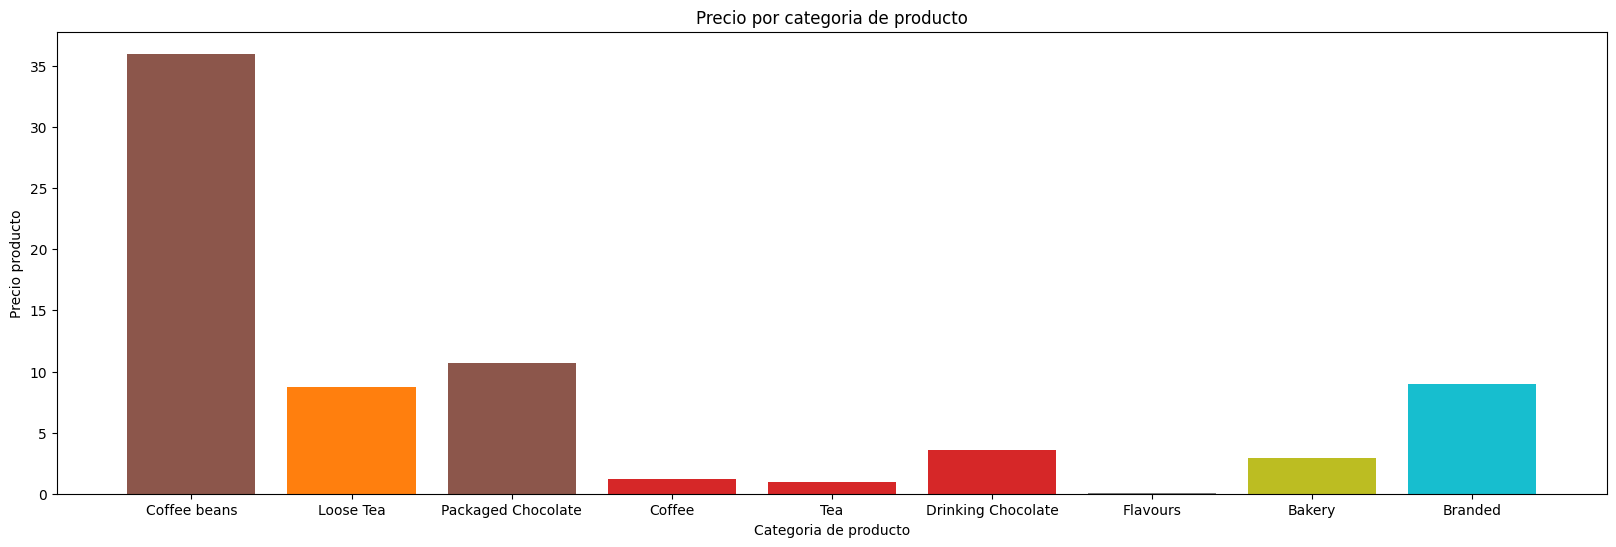

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 6))

# Make data
Mean1 = df6['current_wholesale_price']
Grupo = df6['product_category'].unique()

# Define los colores como una lista
bar_colors = ['tab:brown', 'tab:orange', 'tab:brown', 'tab:red', 'tab:red',
              'tab:red', 'tab:gray', 'tab:olive', 'tab:cyan']

# Creamos un diccionario que mapea cada categoría a un color
color_mapping = {category: color for category, color in zip(Grupo, bar_colors)}

# Plot
for category, price in zip(df6['product_category'], Mean1):
    ax.bar(category, price, color=color_mapping[category])

ax.set_ylabel('Precio producto')
ax.set_xlabel('Categoria de producto')
ax.set_title('Precio por categoria de producto')

plt.show()

En el presente gráfico se aprecia como son los precios de los productos a la venta en relación con la categoría, siendo los granos de café los productos más caros y los saborizantes los más baratos.

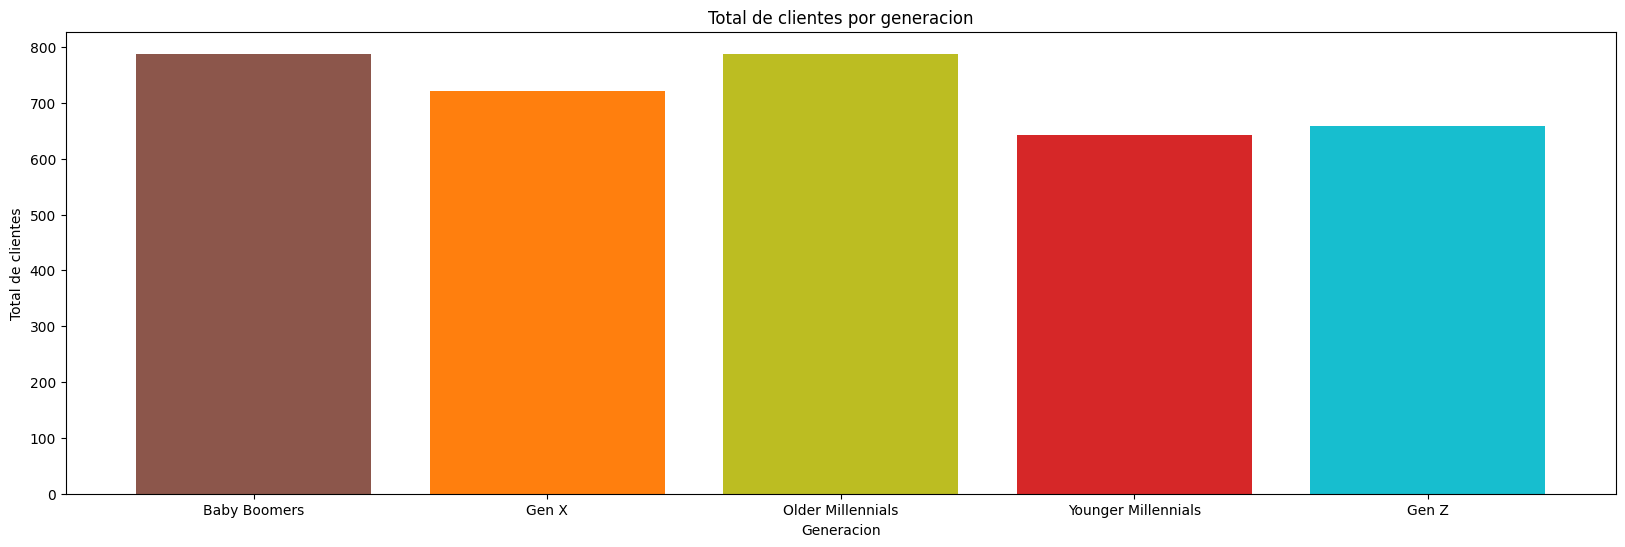

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 6))

# Make data
Sum_client = df1['customer_id']
Generation = df5['generation'].unique()

# Define los colores como una lista
bar_colors = ['tab:brown', 'tab:orange', 'tab:olive', 'tab:red', 'tab:cyan',
              'tab:red', 'tab:gray', 'tab:olive', 'tab:cyan']

# Creamos un diccionario que mapea cada categoría a un color
color_mapping = {category: color for category, color in zip(Generation, bar_colors)}

# Plot
for category, price in zip(df5['generation'], Sum_client):
    ax.bar(category, price, color=color_mapping[category])

ax.set_ylabel('Total de clientes')
ax.set_xlabel('Generacion')
ax.set_title('Total de clientes por generacion')

plt.show()

El gráfico de barras anterior nos permite desarrollar más la hipótesis inicial, como es la distribución de clientes en las cafeterías de esta cadena, y cuales son las edades promedio de las personas que la frecuentan.

Text(0.5, 1.0, 'Genero de clientes')

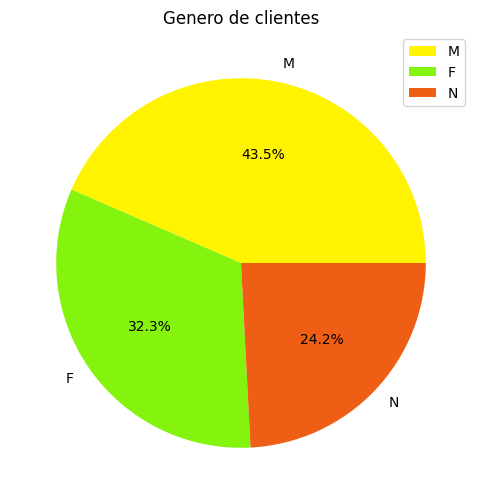

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = df2['gender'].groupby(by=df2['gender']).count()
mylabels = ['M', 'F', 'N']
mycolors = ['#FFF300', '#84F30E', '#EF5E15']


fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(y, labels = mylabels,autopct='%1.1f%%', colors=mycolors)
plt.legend()
ax.set_title('Genero de clientes')

Para segmentar aún más a los clientes de la cafetería, se realizó un Piechart del género de los clientes, destacando que el 43% de ellos son hombres, mientras que 32% mujeres y 24% no quiso responder o se identifican fuera del espectro binario.

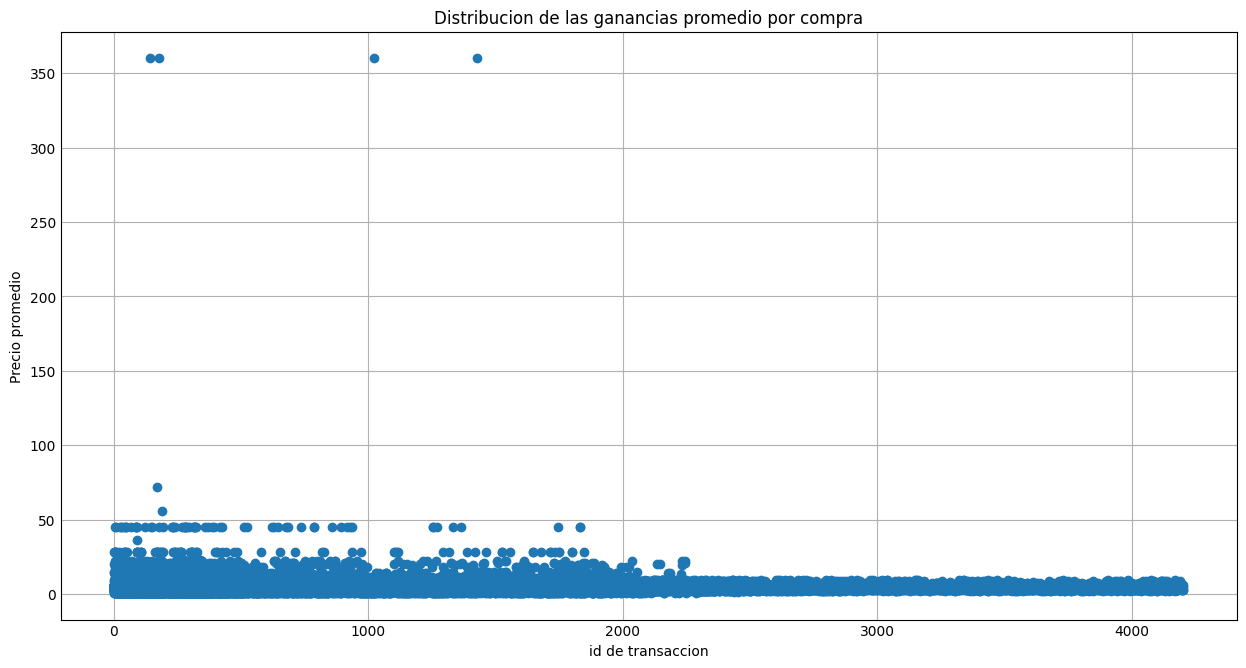

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
y = (df1['quantity'] * df1['unit_price'])
x = df1['transaction_id']

# plot
fig, ax = plt.subplots(figsize=(20, 6))

ax.scatter(x, y, linewidth=1)

ax.set_title('Distribucion de las ganancias promedio por compra')
ax.set_ylabel('Precio promedio')
ax.set_xlabel('id de transaccion')
ax.set_box_aspect(0.5)
ax.autoscale()
plt.show()

En el gráfico de distribución podemos observar que como son las ventas promedio de las cafeterías, por lo general las ganancias por venta son bajas pero la cantidad de transacciones es alta.


In [ ]:
#Esta informacion no será usara para la primera entrega ya que requiere de la union de las hojas en el archivo Excel.
#Info para programar en data2, gracias al tutor Hugo por su ayuda.


total1 = (df1['quantity'] * df1['unit_price'])
total_cafe = (df1['product_category'].values == 'Coffee')

total_ventas = (total1).groupby(by=total_cafe)


print(total1)
#print(total_cafe)
print(total_ventas)

# Conclusión
A forma de conclusión podemos decir que la base de datos nos ha entregado mucha información acerca del comportamiento de los clientes de la franquicia, tanto en sus edades generacionales, sus compras, género, entre otros.

Sin embargo aún falta más investigación para poder concretar si la hipótesis dada en el inicio es cierta o no.
Para esto se necesita re evaluar la distribución de información dentro de la base de datos (uniendo la información en una sola hoja) o trabajando de forma relacional (PK y FK).

Además en las próximas entregas se podrá poner en cuestionamiento la hipótesis haciendo el ejercicio mediante Machine learning e inteligencia artificial.

